<a href="https://colab.research.google.com/github/Mvaishu10/The_Spark_foundation_internship/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Author :- Vaishnavi Mishra
Task 4 :- Stock Market Prediction using Numerical and Textual Analysis



GRIP @ The Sparks Foundation 
Creating  a hybrid model for stock price/performance
prediction using numerical analysis of historical stock prices, and
sentimental analysis of news headlines

In [54]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import altair as alt

# import statsmodels.api as sm 

import yfinance as yf

import tensorflow as tf
from tensorflow import keras
import keras_tuner
# from kerastuner.tuners import RandomSearch

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')

In [55]:
#Collecting data from yahoo finance

#train data
bse_data=yf.download('^BSESN', start='2016-01-04', end='2020-07-30')

[*********************100%***********************]  1 of 1 completed


In [56]:
# The shape of bse data

bse_data.shape

(1122, 6)

In [57]:
bse_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,26116.519531,26116.519531,25596.570312,25623.349609,25623.349609,9100
2016-01-05,25744.699219,25766.759766,25513.750000,25580.339844,25580.339844,10300
2016-01-06,25628.230469,25632.570312,25357.699219,25406.330078,25406.330078,13400
2016-01-07,25224.699219,25230.349609,24825.699219,24851.830078,24851.830078,11800
2016-01-08,24969.019531,25083.550781,24887.220703,24934.330078,24934.330078,15900
...,...,...,...,...,...,...
2020-07-23,37814.921875,38225.031250,37738.589844,38140.468750,38140.468750,19600
2020-07-24,37949.589844,38235.730469,37748.410156,38128.898438,38128.898438,19900
2020-07-27,38275.339844,38275.339844,37769.441406,37934.730469,37934.730469,18600


In [58]:
bse_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [59]:
bse_data.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 
                         'Adj Close': 'adjclose', 'Volume': 'volume'}, inplace = True)

In [60]:
bse_data

,open,high,low,close,adjclose,volume
Date,,,,,,
2016-01-04,26116.519531,26116.519531,25596.570312,25623.349609,25623.349609,9100
2016-01-05,25744.699219,25766.759766,25513.750000,25580.339844,25580.339844,10300
2016-01-06,25628.230469,25632.570312,25357.699219,25406.330078,25406.330078,13400
2016-01-07,25224.699219,25230.349609,24825.699219,24851.830078,24851.830078,11800
2016-01-08,24969.019531,25083.550781,24887.220703,24934.330078,24934.330078,15900
...,...,...,...,...,...,...
2020-07-23,37814.921875,38225.031250,37738.589844,38140.468750,38140.468750,19600
2020-07-24,37949.589844,38235.730469,37748.410156,38128.898438,38128.898438,19900
2020-07-27,38275.339844,38275.339844,37769.441406,37934.730469,37934.730469,18600


In [61]:
# checking for missing values, size, datatypes etc

bse_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1122 entries, 2016-01-04 to 2020-07-29
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      1122 non-null   float64
 1   high      1122 non-null   float64
 2   low       1122 non-null   float64
 3   close     1122 non-null   float64
 4   adjclose  1122 non-null   float64
 5   volume    1122 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 61.4 KB


In [62]:
bse_data = bse_data[['close']]
bse_data

,close
Date,
2016-01-04,25623.349609
2016-01-05,25580.339844
2016-01-06,25406.330078
2016-01-07,24851.830078
2016-01-08,24934.330078
...,...
2020-07-23,38140.468750
2020-07-24,38128.898438
2020-07-27,37934.730469


<AxesSubplot:xlabel='Date', ylabel='close'>

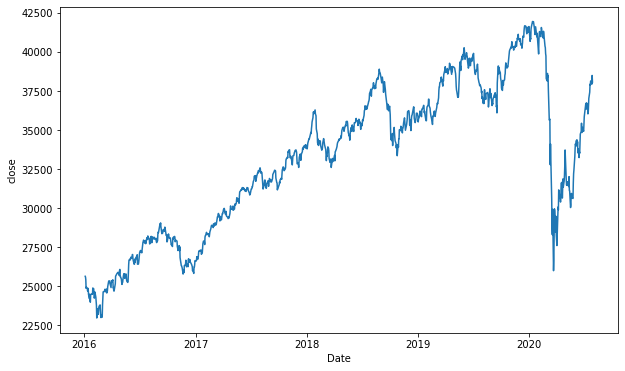

In [63]:
#Plotting the closing price

index = bse_data.index

plt.figure(figsize = (10,6))
sns.lineplot(x = index, y = bse_data['close'])

In [64]:
# Scaling the data

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(bse_data)

In [65]:
scaled_data

array([[0.14060038],
       [0.1383368 ],
       [0.12917878],
       ...,
       [0.78854055],
       [0.81791925],
       [0.79571912]])

In [66]:
 
#Splitting the data 

train_size = 0.80
len_train_data = round(len(bse_data) * train_size)

train_data = scaled_data[0 : len_train_data]
test_data = scaled_data[len_train_data :]

In [67]:
# The shape of training data and testing data

train_data.shape, test_data.shape


((898, 1), (224, 1))

In [68]:
#Creating features for future prediction

#We will use past 90 days data to predict the present

def feature_extraction(data, start, end):
  X_train = []
  y_train=[]
  for i in range(start,end):
    X_train.append(data[i-50:i])
    y_train.append(data[i])
  return X_train, y_train

In [69]:
#Creating training data

X_train, y_train = feature_extraction(train_data, 50, len(train_data))

#creating testing data

X_test,y_test = feature_extraction(test_data, 50, len(test_data))

In [70]:
#Converting the list to numpy array

#Training data

X_train = np.array(X_train)
y_train = np.array(y_train)

#Testing data
X_test = np.array(X_test)
y_test = np.array(y_test)

In [71]:
print(f'The shape of X_train : {X_train.shape}')
print(f'The shape of y_train : {y_train.shape}')

print(f'The shape of X_test : {X_test.shape}')
print(f'The shape of y_test : {y_test.shape}')

The shape of X_train : (848, 50, 1)
The shape of y_train : (848, 1)
The shape of X_test : (174, 50, 1)
The shape of y_test : (174, 1)


In [72]:
# Creating X_train DataFrame

#In order to get the original value we should inverse transform the scaled data
# We inverse transform here because we will later use it for visualization

train_df = pd.DataFrame(scaler.inverse_transform(X_train.reshape(-1, 50)), 
                        index = np.arange(0, len(X_train)))
train_df['target'] = scaler.inverse_transform(y_train)
train_df

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,target
0,25623.349609,25580.339844,25406.330078,24851.830078,24934.330078,24825.039062,24682.029297,24854.109375,24772.970703,24455.039062,...,24242.980469,24606.990234,24646.480469,24659.230469,24793.960938,24623.339844,24717.990234,24804.279297,24551.169922,24682.480469
1,25580.339844,25406.330078,24851.830078,24934.330078,24825.039062,24682.029297,24854.109375,24772.970703,24455.039062,24188.369141,...,24606.990234,24646.480469,24659.230469,24793.960938,24623.339844,24717.990234,24804.279297,24551.169922,24682.480469,24677.369141
2,25406.330078,24851.830078,24934.330078,24825.039062,24682.029297,24854.109375,24772.970703,24455.039062,24188.369141,24479.839844,...,24646.480469,24659.230469,24793.960938,24623.339844,24717.990234,24804.279297,24551.169922,24682.480469,24677.369141,24952.740234
3,24851.830078,24934.330078,24825.039062,24682.029297,24854.109375,24772.970703,24455.039062,24188.369141,24479.839844,24062.039063,...,24659.230469,24793.960938,24623.339844,24717.990234,24804.279297,24551.169922,24682.480469,24677.369141,24952.740234,25285.369141
4,24934.330078,24825.039062,24682.029297,24854.109375,24772.970703,24455.039062,24188.369141,24479.839844,24062.039063,23962.210937,...,24793.960938,24623.339844,24717.990234,24804.279297,24551.169922,24682.480469,24677.369141,24952.740234,25285.369141,25330.490234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,39784.519531,39950.460937,39756.808594,39741.359375,39452.070312,38960.789062,39046.339844,39112.738281,39601.628906,39194.488281,...,36976.851562,36690.500000,37327.359375,37581.910156,36958.160156,37311.531250,37350.328125,37402.488281,37328.011719,37060.371094
844,39950.460937,39756.808594,39741.359375,39452.070312,38960.789062,39046.339844,39112.738281,39601.628906,39194.488281,39122.960938,...,36690.500000,37327.359375,37581.910156,36958.160156,37311.531250,37350.328125,37402.488281,37328.011719,37060.371094,36472.929688
845,39756.808594,39741.359375,39452.070312,38960.789062,39046.339844,39112.738281,39601.628906,39194.488281,39122.960938,39434.941406,...,37327.359375,37581.910156,36958.160156,37311.531250,37350.328125,37402.488281,37328.011719,37060.371094,36472.929688,36701.160156
846,39741.359375,39452.070312,38960.789062,39046.339844,39112.738281,39601.628906,39194.488281,39122.960938,39434.941406,39592.078125,...,37581.910156,36958.160156,37311.531250,37350.328125,37402.488281,37328.011719,37060.371094,36472.929688,36701.160156,37494.121094


In [73]:
# Creating X test DataFrame

test_df = pd.DataFrame(scaler.inverse_transform(X_test.reshape(-1, 50)),
                       index = np.arange(len(X_train), len(X_train) + len(X_test)))
test_df['target'] = scaler.inverse_transform(y_test)
test_df

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,target
848,37451.839844,37068.929688,37332.789062,36562.910156,36724.738281,36644.421875,36981.769531,37145.449219,37270.820312,37104.281250,...,40165.031250,40301.960938,40248.230469,40469.781250,40653.738281,40323.609375,40345.078125,40116.058594,40286.480469,40356.691406
849,37068.929688,37332.789062,36562.910156,36724.738281,36644.421875,36981.769531,37145.449219,37270.820312,37104.281250,37384.988281,...,40301.960938,40248.230469,40469.781250,40653.738281,40323.609375,40345.078125,40116.058594,40286.480469,40356.691406,40284.191406
850,37332.789062,36562.910156,36724.738281,36644.421875,36981.769531,37145.449219,37270.820312,37104.281250,37384.988281,37123.308594,...,40248.230469,40469.781250,40653.738281,40323.609375,40345.078125,40116.058594,40286.480469,40356.691406,40284.191406,40469.699219
851,36562.910156,36724.738281,36644.421875,36981.769531,37145.449219,37270.820312,37104.281250,37384.988281,37123.308594,36481.089844,...,40469.781250,40653.738281,40323.609375,40345.078125,40116.058594,40286.480469,40356.691406,40284.191406,40469.699219,40651.640625
852,36724.738281,36644.421875,36981.769531,37145.449219,37270.820312,37104.281250,37384.988281,37123.308594,36481.089844,36563.878906,...,40653.738281,40323.609375,40345.078125,40116.058594,40286.480469,40356.691406,40284.191406,40469.699219,40651.640625,40575.171875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,32008.609375,31122.890625,31097.730469,30028.980469,30196.169922,30818.609375,30932.900391,30672.589844,30609.300781,31605.220703,...,36594.328125,36693.691406,36033.058594,36051.808594,36471.679688,37020.140625,37418.988281,37930.328125,37871.519531,38140.468750
1018,31122.890625,31097.730469,30028.980469,30196.169922,30818.609375,30932.900391,30672.589844,30609.300781,31605.220703,32200.589844,...,36693.691406,36033.058594,36051.808594,36471.679688,37020.140625,37418.988281,37930.328125,37871.519531,38140.468750,38128.898438
1019,31097.730469,30028.980469,30196.169922,30818.609375,30932.900391,30672.589844,30609.300781,31605.220703,32200.589844,32424.099609,...,36033.058594,36051.808594,36471.679688,37020.140625,37418.988281,37930.328125,37871.519531,38140.468750,38128.898438,37934.730469
1020,30028.980469,30196.169922,30818.609375,30932.900391,30672.589844,30609.300781,31605.220703,32200.589844,32424.099609,33303.519531,...,36051.808594,36471.679688,37020.140625,37418.988281,37930.328125,37871.519531,38140.468750,38128.898438,37934.730469,38492.949219


In [74]:
model = keras.Sequential()
model.add(keras.layers.LSTM(units = 384, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(keras.layers.LSTM(units = 384, return_sequences = True))
model.add(keras.layers.LSTM(units = 384, return_sequences = True))
model.add(keras.layers.LSTM(units = 384, return_sequences = False))
model.add(keras.layers.Dense(units = 1, activation = "sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50, 384)           592896    
                                                                 
 lstm_5 (LSTM)               (None, 50, 384)           1181184   
                                                                 
 lstm_6 (LSTM)               (None, 50, 384)           1181184   
                                                                 
 lstm_7 (LSTM)               (None, 384)               1181184   
                                                                 
 dense_1 (Dense)             (None, 1)                 385       
                                                                 
Total params: 4,136,833
Trainable params: 4,136,833
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(optimizer = 'adam', loss = 'mse')
callback_chk = keras.callbacks.ModelCheckpoint(filepath = 'best_model.h5', save_best_only = True)
model_history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_test, y_test), callbacks = [callback_chk])

Epoch 1/30
27/27 [==============================] - 78s 2s/step - loss: 0.0192 - val_loss: 0.0234
Epoch 2/30
27/27 [==============================] - 52s 2s/step - loss: 0.0021 - val_loss: 0.0179
Epoch 3/30
27/27 [==============================] - 52s 2s/step - loss: 0.0016 - val_loss: 0.0155
Epoch 4/30
27/27 [==============================] - 49s 2s/step - loss: 0.0017 - val_loss: 0.0134
Epoch 5/30
27/27 [==============================] - 51s 2s/step - loss: 0.0015 - val_loss: 0.0118
Epoch 6/30
27/27 [==============================] - 48s 2s/step - loss: 0.0013 - val_loss: 0.0102
Epoch 7/30
27/27 [==============================] - 48s 2s/step - loss: 0.0011 - val_loss: 0.0091
Epoch 8/30
27/27 [==============================] - 49s 2s/step - loss: 0.0010 - val_loss: 0.0080
Epoch 9/30
27/27 [==============================] - 52s 2s/step - loss: 0.0011 - val_loss: 0.0074
Epoch 10/30
27/27 [==============================] - 50s 2s/step - loss: 9.8832e-04 - val_loss: 0.0061
Epoch 11/30
27/

In [76]:
model = keras.models.load_model('best_model.h5')

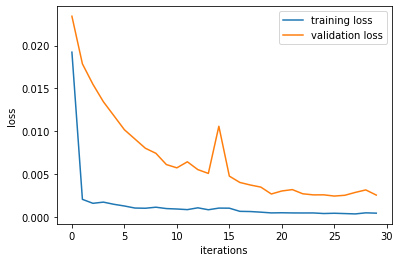

In [77]:
#Plotting the losses

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
index = np.arange(30)

sns.lineplot(x = index, y = loss)
sns.lineplot(x = index, y = val_loss)
plt.ylabel('loss')
plt.xlabel('iterations')
plt.legend(['training loss','validation loss'])

In [78]:
# lets try to predict with some data 

preds = model.predict(X_test)

6/6 [==============================] - 4s 354ms/step


In [79]:
#Performing inverse transformation on predictions and actual value

preds_inv = scaler.inverse_transform(preds)
y_test_inv = scaler.inverse_transform(y_test)

In [80]:
#evaluating the performance of the model

#MAE
print('MAE : ', mean_absolute_error(y_test_inv, preds_inv), end='\n')

#MSE
print('MSE : ', mean_squared_error(y_test_inv, preds_inv), end='\n')

#RMSE
print('RMSE : ', np.sqrt(mean_squared_error(y_test_inv, preds_inv)))

MAE :  739.4395653735634
MSE :  883361.775279122
RMSE :  939.8732761809551


In [81]:
# R squared

r2_score(y_test_inv, preds_inv)

0.9560340087268838

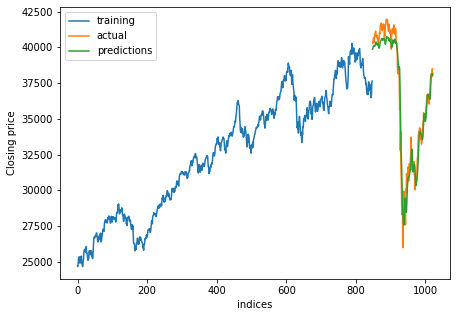

In [82]:
#Plotting the training data,testing data and predicted data

plt.figure(figsize = (7,5))
train_df['target'].plot()
test_df['target'].plot()

test_df['predictions'] = preds_inv
test_df['predictions'].plot()

plt.xlabel('indices')
plt.ylabel('Closing price')
plt.legend(['training','actual','predictions'])
plt.show()

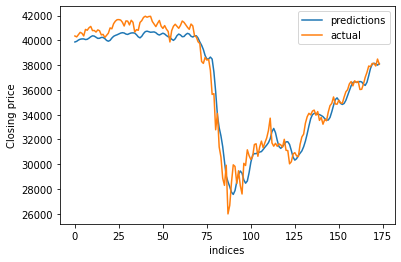

In [83]:
#Zooming the predictions portion

plt.plot(preds_inv)
plt.plot(y_test_inv)

plt.legend(['predictions','actual'])
plt.xlabel('indices')
plt.ylabel('Closing price')
plt.show()

In [84]:
data_news = pd.read_csv('india-news-headlines.csv')

In [85]:
data_news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [86]:
#Converting the publish date data type to date time

data_news['Date'] = pd.to_datetime(data_news['publish_date'], format = '%Y%m%d')
data_news.drop(columns = 'publish_date', inplace = True)

In [87]:
data_news

,headline_category,headline_text,Date
0,unknown,Status quo will not be disturbed at Ayodhya; s...,2001-01-02
1,unknown,Fissures in Hurriyat over Pak visit,2001-01-02
2,unknown,America's unwanted heading for India?,2001-01-02
3,unknown,For bigwigs; it is destination Goa,2001-01-02
4,unknown,Extra buses to clear tourist traffic,2001-01-02
...,...,...,...
2728616,business.international-business,Under EU attack; top palm oil producers rethin...,2017-09-13
2728617,business.international-business,Hurricane Irma batters already struggling Cuba...,2017-09-13
2728618,city.ahmedabad,Modi-Abe friendship skips Delhi; heads for Guj...,2017-09-13
2728619,business.international-business,Energen seeks court ruling on investor rights ...,2017-09-13


In [88]:
#How Textblob works

test = 'I am a not very good girl'
TextBlob(test).sentiment

Sentiment(polarity=-0.26923076923076916, subjectivity=0.46153846153846156)

In [89]:
#Fucntions to obtain polarity and subjectivity from the text

def polarity(text):
  pol_val = TextBlob(text).sentiment.polarity
  return pol_val
def subjectivity(text):
  sub_val = TextBlob(text).sentiment.subjectivity
  return sub_val

In [90]:
# Function for Sentiment analysis

def sentiment_analysis(polarity_val):
  if polarity_val > 0:
    senti_val = 'Positive'
  elif polarity_val == 0:
    senti_val = "Neutral"
  else:
    senti_val = 'Negative'
  return senti_val

In [91]:
data_news

,headline_category,headline_text,Date
0,unknown,Status quo will not be disturbed at Ayodhya; s...,2001-01-02
1,unknown,Fissures in Hurriyat over Pak visit,2001-01-02
2,unknown,America's unwanted heading for India?,2001-01-02
3,unknown,For bigwigs; it is destination Goa,2001-01-02
4,unknown,Extra buses to clear tourist traffic,2001-01-02
...,...,...,...
2728616,business.international-business,Under EU attack; top palm oil producers rethin...,2017-09-13
2728617,business.international-business,Hurricane Irma batters already struggling Cuba...,2017-09-13
2728618,city.ahmedabad,Modi-Abe friendship skips Delhi; heads for Guj...,2017-09-13
2728619,business.international-business,Energen seeks court ruling on investor rights ...,2017-09-13


In [91]:
# Merging the stocks dataframe and the news dataframe on date column

data_final = pd.merge(data_news, bse_data, on = "Date", how = 'right')

In [95]:
data_news.drop(1, inplace=True)
data_news.drop('headline_category', axis = 1, inplace=True)
data_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2728619 entries, 2 to 2728620
Data columns (total 2 columns):
 #   Column         Dtype         
---  ------         -----         
 0   headline_text  object        
 1   Date           datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 62.5+ MB


In [99]:
data_news['headline_text']

2                      America's unwanted heading for India?
3                         For bigwigs; it is destination Goa
4                       Extra buses to clear tourist traffic
5                Dilute the power of transfers; says Riberio
6                          Focus shifts to teaching of Hindi
                                 ...                        
2728616    Under EU attack; top palm oil producers rethin...
2728617    Hurricane Irma batters already struggling Cuba...
2728618    Modi-Abe friendship skips Delhi; heads for Guj...
2728619    Energen seeks court ruling on investor rights ...
2728620                                                  NaN
Name: headline_text, Length: 2728619, dtype: object

In [100]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [106]:
merge = data_news
merge

,headline_text,Date
2,America's unwanted heading for India?,2001-01-02
3,For bigwigs; it is destination Goa,2001-01-02
4,Extra buses to clear tourist traffic,2001-01-02
5,Dilute the power of transfers; says Riberio,2001-01-02
6,Focus shifts to teaching of Hindi,2001-01-02
...,...,...
2728616,Under EU attack; top palm oil producers rethin...,2017-09-13
2728617,Hurricane Irma batters already struggling Cuba...,2017-09-13
2728618,Modi-Abe friendship skips Delhi; heads for Guj...,2017-09-13
2728619,Energen seeks court ruling on investor rights ...,2017-09-13
